# Linear Models

The following just gives us some tools we'll need

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from numpy.random import multivariate_normal
from sklearn.metrics import accuracy_score

In [2]:
# A small utility we shall need later:
def maxpos(A):
    '''
    Takes an n x k array A, and returns 1-dim n array where the i'th
    entry is the index of column in A where the i'th row of A has its
    maximal value (application: turns a probabilitiy distribution over
    k classes for n instances into a single prediction)
    '''
    return np.argmax(A,axis=1)


## Iris Data and Decision Regions

We load the Iris dataset and inspect what it is about. Iris is probably the most heavily used dataset in machine learning. It even has its own Wikipedia page: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [3]:
irisdata = load_iris()

print(irisdata.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The Iris data contains 4 features. In order to facillitate visualization of decision regions,
it is better to use two features only, that then can be plotted in 2D. Here we select
two features, and make a scatter plot of their values:

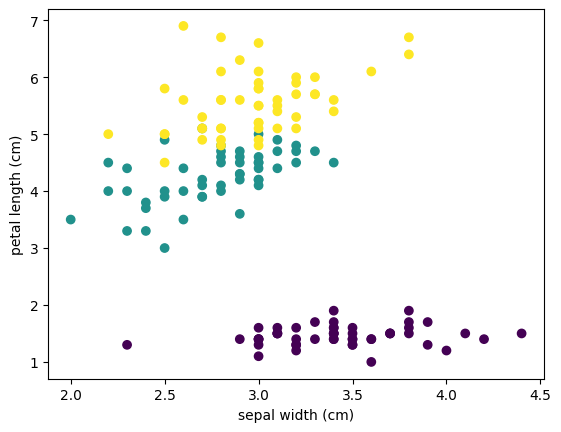

In [4]:
feat1 = 1
feat2 = 2
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target)
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.show()

We next define and train several classification models. We continue to only use the first two features of the data.

First, the **K nearest neighbor** model. To define the model, we have to select the value of K, here called n_neighbors. The .fit function is the generic function for model training. For the K nearest neighbor model there is no actual training, however. 

In [5]:
irisknn = KNeighborsClassifier(n_neighbors=1)
irisknn.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)

KNeighborsClassifier(n_neighbors=1)

Plotting labeled data points and decision regions. First, a meshgrid is constructed consisting of a fine grid of points that we classify, and then use for visualization of the decision regions. Then, our classifier is applied to the grid.


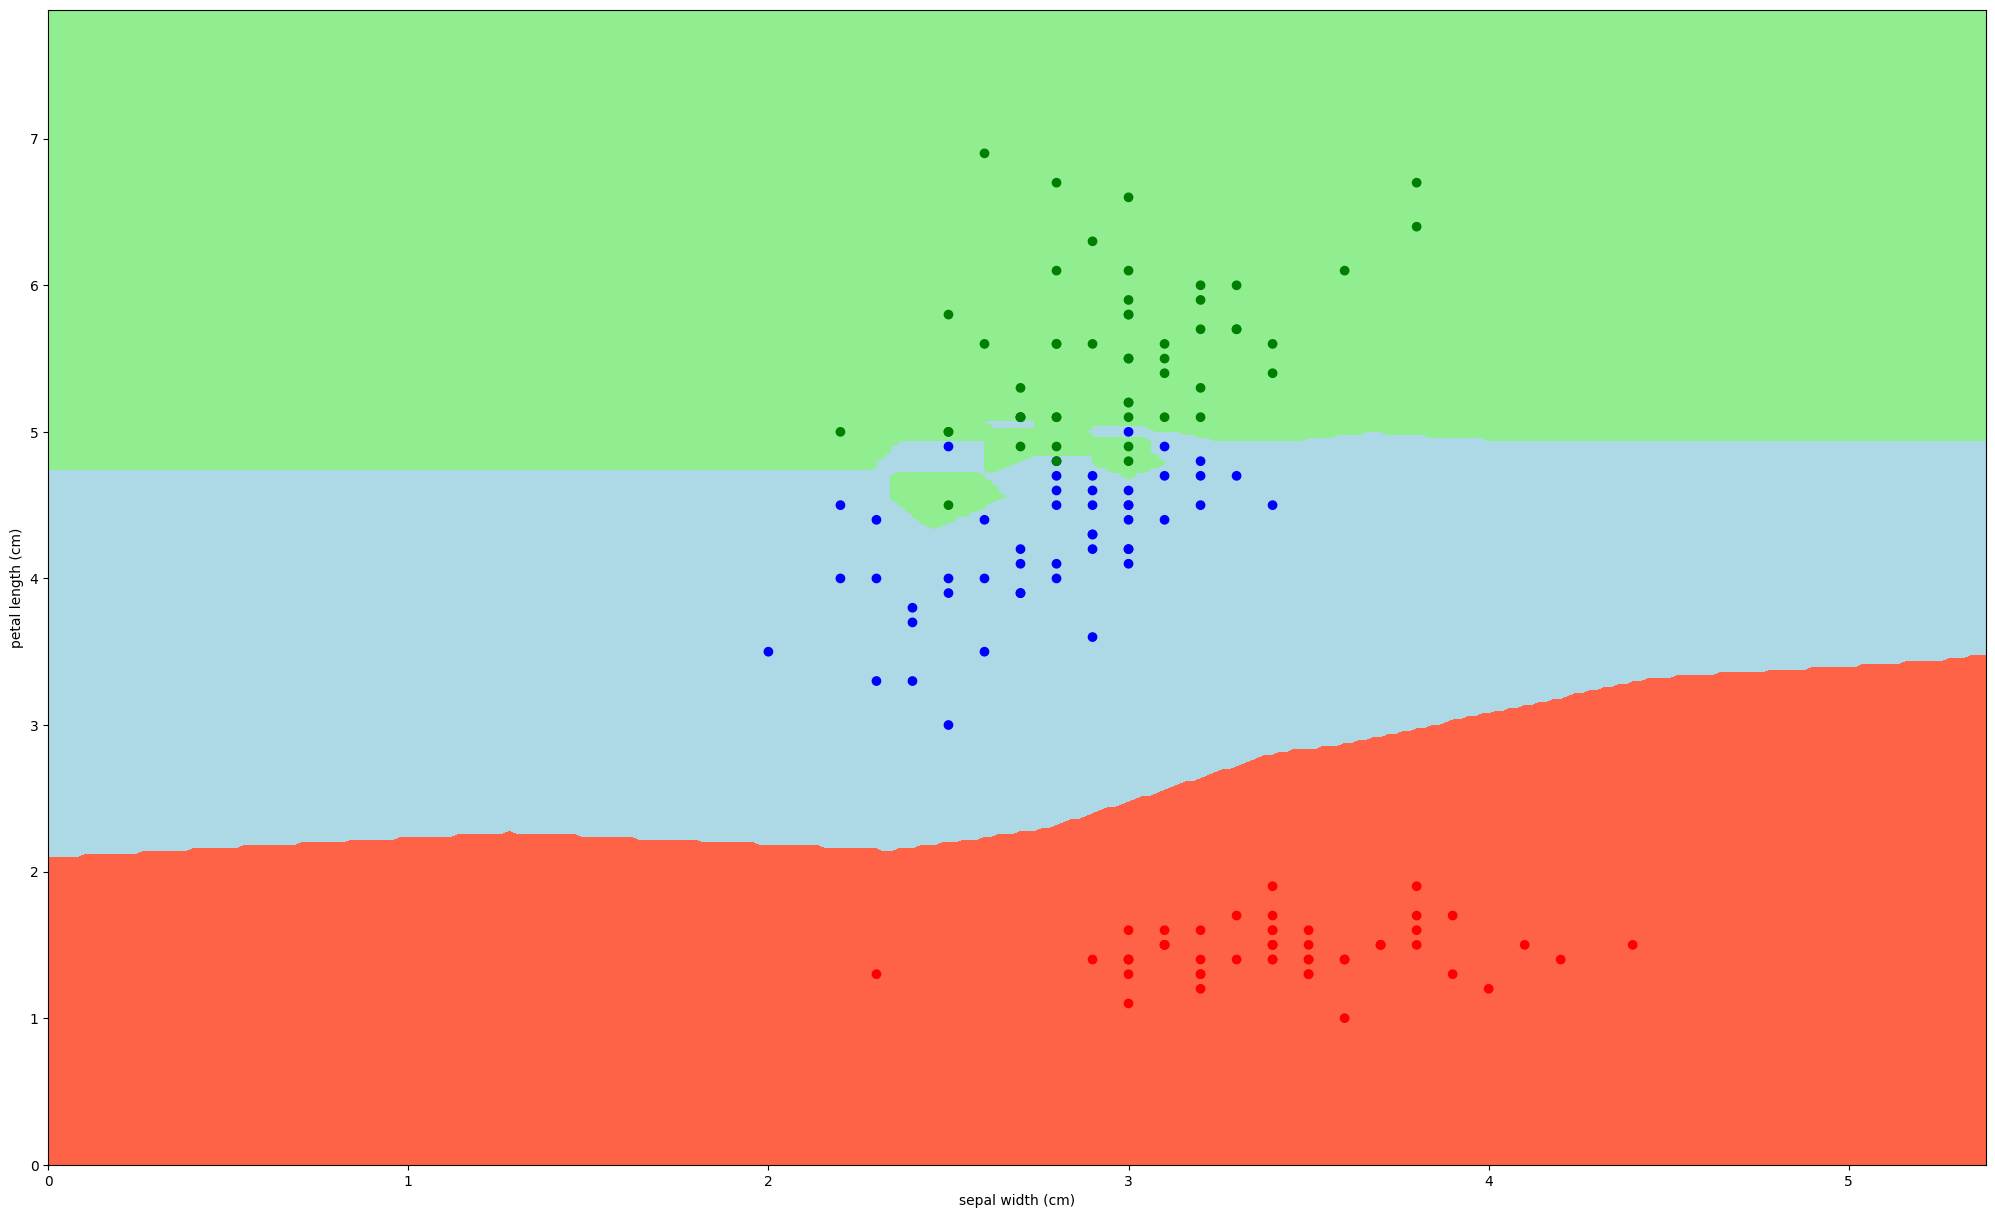

In [6]:
maxval1 = np.max(irisdata.data[:,feat1])
maxval2 = np.max(irisdata.data[:,feat2])

xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))

meshclasses = irisknn.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = meshclasses.reshape(xx.shape)

plt.figure(figsize=(25,15))
plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])

plt.show()

## Linear Functions

We define a simple linear classifier for 2-dimensional inputs with manually defined parameters w,w0 for the linear function:

In [7]:
w=[0.3,4.5]
w0=1.5

def predict(w,x0,x):
    return np.sign(np.dot(w,x)+w0)

We can again visualize the decision regions defined by the function:

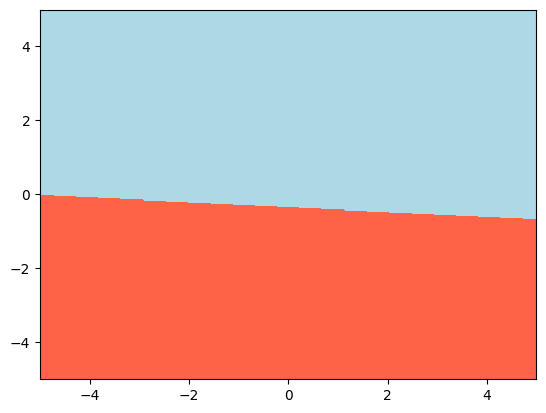

In [8]:
xx, yy = np.meshgrid(np.arange(-5, 5, 0.03), np.arange(-5, 5, 0.03))


meshclasses=np.vectorize(predict,signature='(n),(),(n)->()')(w,w0,np.c_[xx.ravel(), yy.ravel()])
meshclasses = meshclasses.reshape(xx.shape)
plt.contourf(xx,yy,meshclasses,[-1.5,0,1.5],colors=('tomato','lightblue'))
plt.show()

Now we construct a small linearly separable dataset:

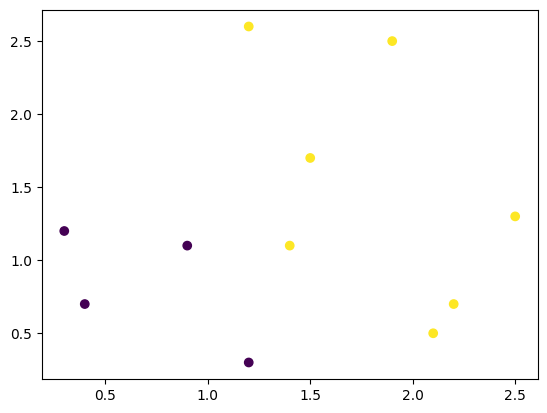

In [9]:
features=np.array([[0.3,1.2],[0.4,0.7],[1.2,2.6],[2.1,0.5],[1.2,0.3],[0.9,1.1],[2.5,1.3],[2.2,0.7],[1.9,2.5],[1.5,1.7],[1.4,1.1]])
labels=np.array([-1,-1,1,1,-1,-1,1,1,1,1,1])
plt.scatter(features[:,0],features[:,1],c=labels)
plt.show()

<b>** Exercise 1: **</b>  Determine parameters w,w0 so that predict(w,w0,:) has zero error on this dataset. Plot the decision regions of your predictor together with the datapoints. Use as few trial and error settings for w,w0 as possible (ideally: zero trial and error). 

In [10]:
clf = LinearDiscriminantAnalysis()
clf.fit(features,labels)
clf.intercept_, clf.coef_

(array([-15.46153375]), array([[8.80015426, 4.23699308]]))

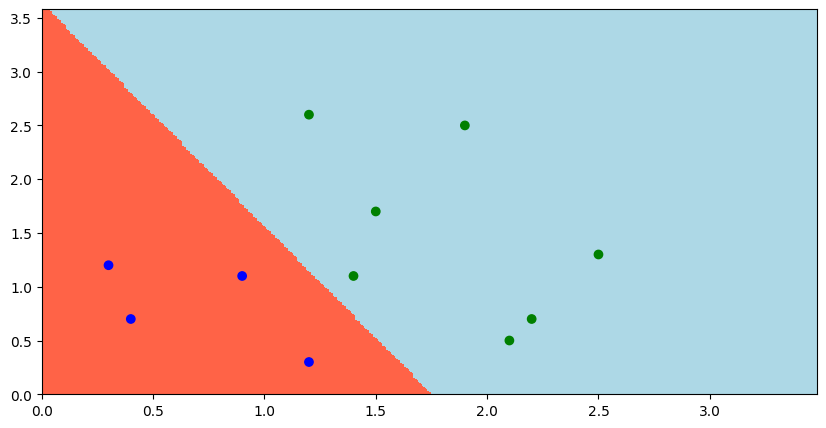

In [11]:
maxval1 = np.max(features[:,0])
maxval2 = np.max(features[:,1])
w0 = clf.intercept_
w = clf.coef_


xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))

meshclasses=np.vectorize(predict,signature='(n),(),(n)->()')(w,w0,np.c_[xx.ravel(), yy.ravel()])
meshclasses = meshclasses.reshape(xx.shape)

plt.figure(figsize=(10,5))
plt.contourf(xx,yy,meshclasses,[-1.5,0,1.5],colors=('tomato','lightblue'))
plt.scatter(features[:,0],features[:,1],c=labels, cmap = mpl.colors.ListedColormap(['b', 'g']))

plt.show()

## Least Squares Regression

The least squares classification model corresponds to LinearRegression in sklearn with one-hot-encoding class labels as targets. We here fit a linear regression model to the Iris data, and visualize the decision regions:

In [12]:
onehotclasses = np.zeros((irisdata.target.size,3))
for i in range(irisdata.target.size):
    onehotclasses[i][irisdata.target[i]]=1.0

irislinreg = LinearRegression()
irislinreg.fit(irisdata.data[:,[feat1,feat2]],onehotclasses)

LinearRegression()

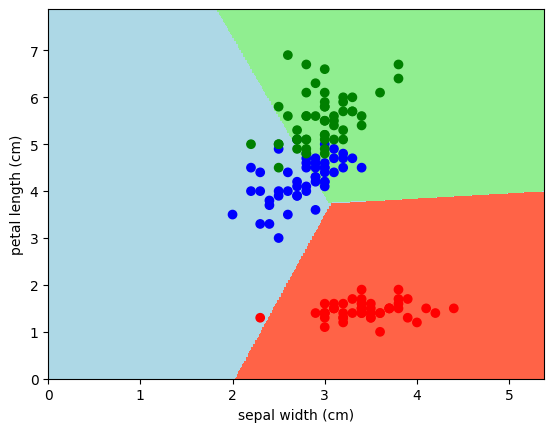

In [13]:

maxval1 = np.max(irisdata.data[:,feat1])
maxval2 = np.max(irisdata.data[:,feat2])
xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))

Z = irislinreg.predict(np.c_[xx.ravel(), yy.ravel()])

meshclasses = maxpos(Z)


meshclasses = meshclasses.reshape(xx.shape)
plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.show()

**Exercise 2** Manually construct two datasets with three classes, where: 
<ul>
    <li>for the first dataset the LinearRegression classifier finds a 100% accurate model</li>
    <li>for the second dataset the LinearRegression classifier does not learn a 100% accurate model, but you can manually define the coefficients in the model so that you get 100% accuracy</li>
    </ul>
    
You can create a LinearRegression model with your manually constructed parameters by setting the .coef_ and .intercept_ attributes:    

<pre>mymodel= LinearRegression()
mymodel.coef_ = (your matrix of coefficients)
mymodel.intercept_ = (your vector of w0 parameters)
</pre>

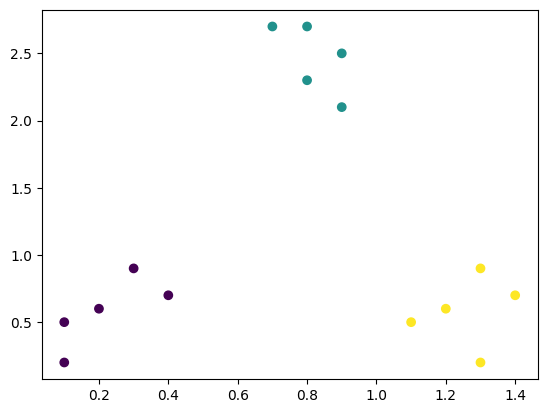

In [14]:
features=np.array([[0.1,0.2],[0.4,0.7],[0.2,0.6],[0.1,0.5],[0.3,0.9],[0.9,2.1],[0.8,2.3],[0.8,2.7],[0.9,2.5],[0.7,2.7],[1.3,0.2],[1.4,0.7],[1.2,0.6],[1.1,0.5],[1.3,0.9]])
labels=np.array([-1,-1,-1,-1,-1,0,0,0,0,0,1,1,1,1,1])
plt.scatter(features[:,0],features[:,1],c=labels)
plt.show()

In [15]:
onehotclasses = np.zeros((labels.size,3))
for i in range(labels.size):
    onehotclasses[i][labels[i]]=1.0

m1 = LinearRegression()
m1.fit(features,onehotclasses)
m1.coef_,m1.intercept_

(array([[-0.00657653,  0.4980754 ],
        [ 0.91645873, -0.29062458],
        [-0.9098822 , -0.20745082]]),
 array([-0.26263564, -0.01859804,  1.28123368]))

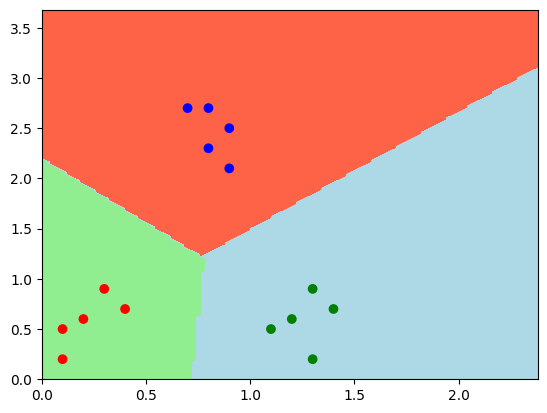

In [16]:

maxval1 = np.max(features[:,0])
maxval2 = np.max(features[:,1])
xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))
w0 = m1.intercept_
w = m1.coef_

Z = m1.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = maxpos(Z)
meshclasses = meshclasses.reshape(xx.shape)
plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(features[:,0],features[:,1],c=labels, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.show()

**Exercise 3 (self study):** Divide the iris data into 70% training and 30% test data. Learn KNN and linear regression classifiers from the training data, and evaluate their accuracy both on the training and test data. For the KNN classifier,
draw the curves that show train/test accuracy as a function of K. Useful sklearn functions:<br>
`sklearn.model selection.train test split`<br>
`sklearn.metrics.accuracy score`<br>
`sklearn.metrics.confusion matrix`

KNN train accuracy:  0.9904761904761905
KNN test accuracy:  0.9333333333333333
Linear regression train accuracy:  0.7333333333333333
Linear regression test accuracy:  0.6888888888888889


C:\Users\Vugs\AppData\Local\Temp\ipykernel_19744\1012137476.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=onehotclasses, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))


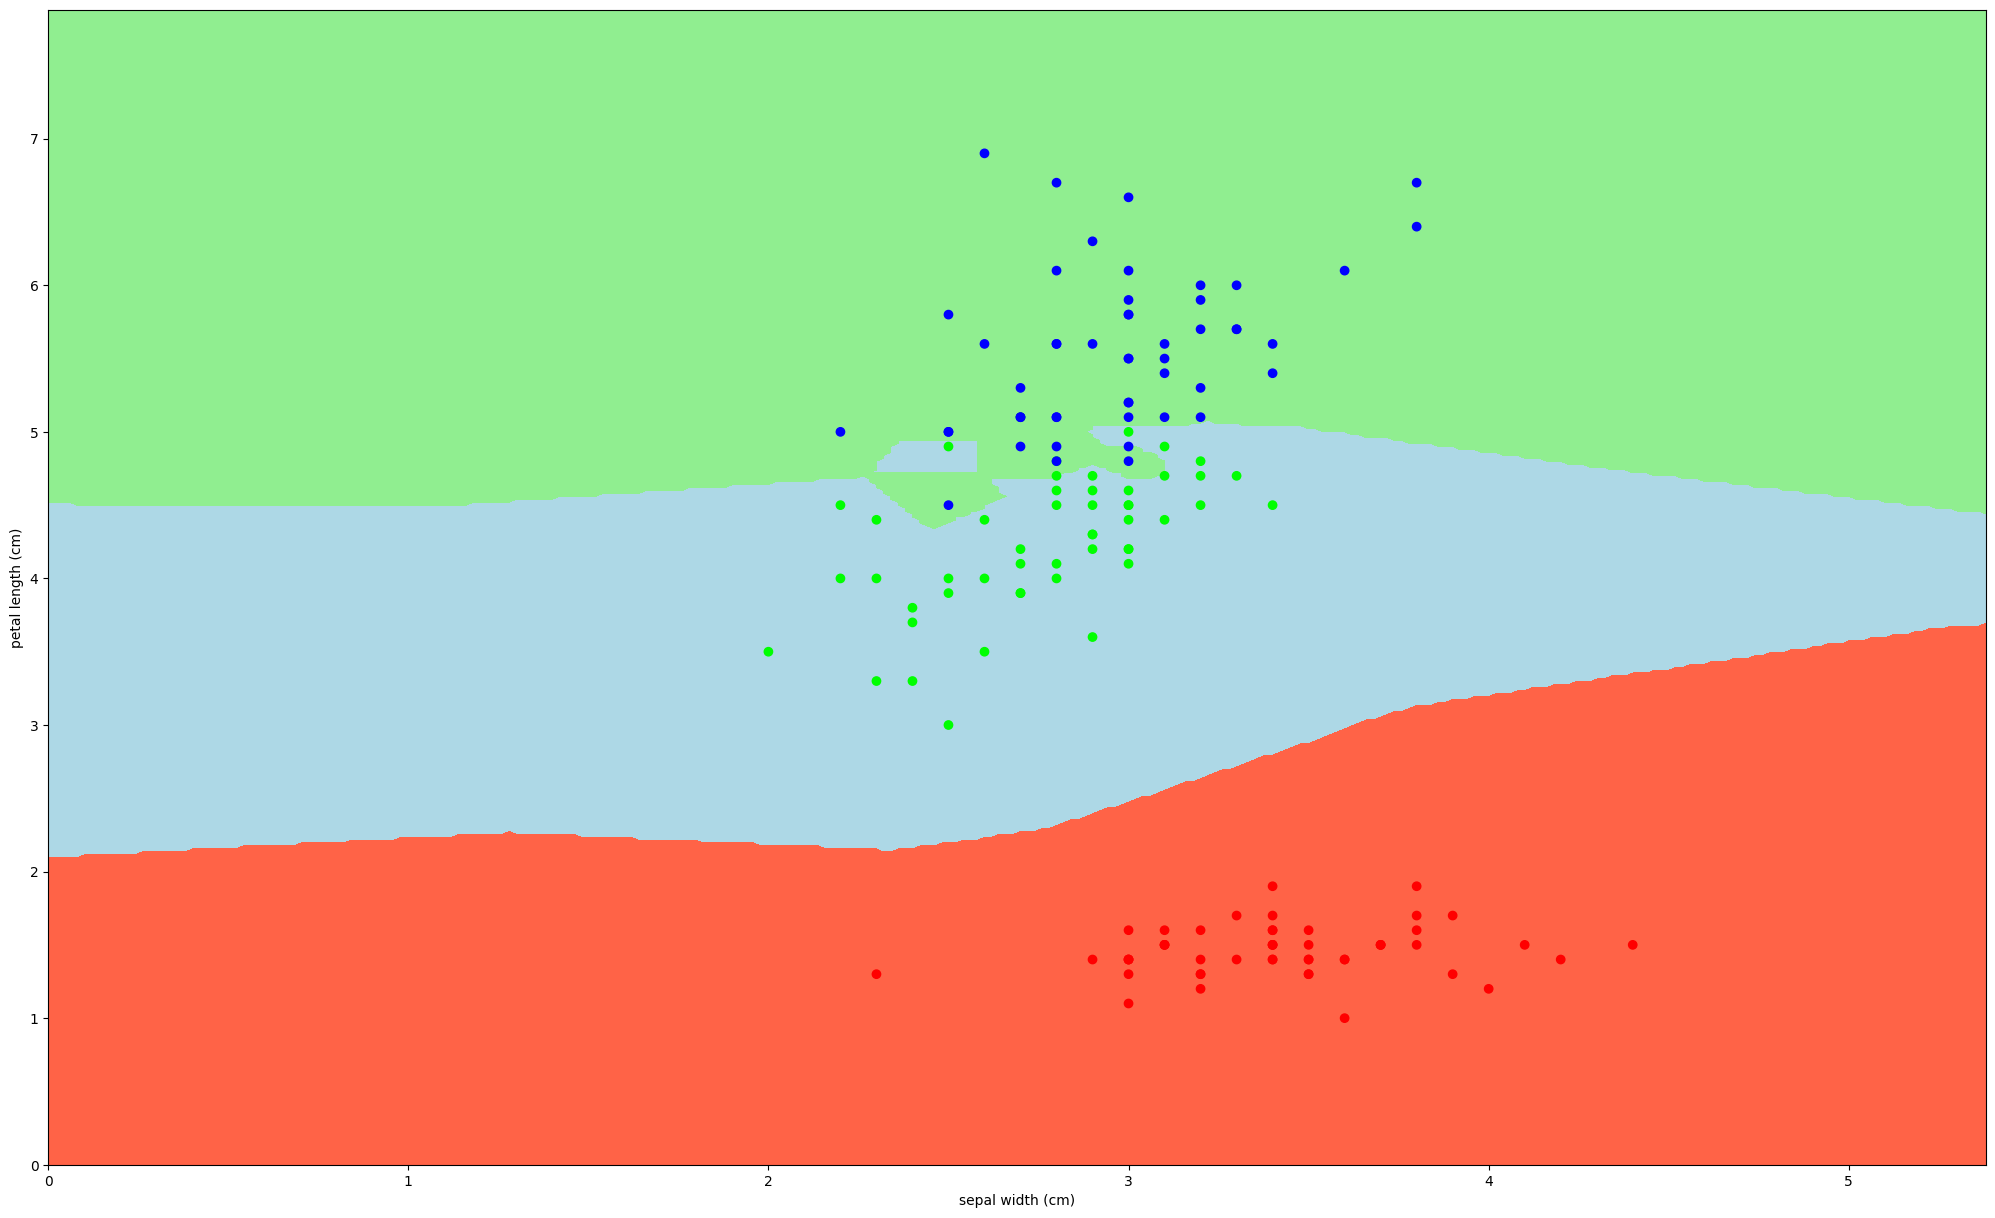

In [17]:
# Divide the iris data into 70% training and 30% test data.
from sklearn.model_selection import train_test_split

# Applying onehot encoding to the labels
onehotclasses = np.zeros((irisdata.target.size,3))
for i in range(irisdata.target.size):
    onehotclasses[i][irisdata.target[i]]=1.0

# X_train, X_test, y_train, y_test = train_test_split(irisdata.data[:, [feat1, feat2]], irisdata.target, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(irisdata.data[:, [feat1, feat2]], onehotclasses, test_size=0.3, random_state=42)


# Learn KNN and linear regression classifiers from the training data.
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train,y_train)
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)

# Evaluate their accuracy both on the training and test data.
from sklearn.metrics import accuracy_score
print("KNN train accuracy: ",accuracy_score(y_train,knn_clf.predict(X_train)))
print("KNN test accuracy: ",accuracy_score(y_test,knn_clf.predict(X_test)))
print("Linear regression train accuracy: ",accuracy_score(y_train,lr_clf.predict(X_train).round()))
print("Linear regression test accuracy: ",accuracy_score(y_test,lr_clf.predict(X_test).round()))

# Plot the decision boundaries of the two classifiers.
maxval1 = np.max(irisdata.data[:,feat1])
maxval2 = np.max(irisdata.data[:,feat2])

xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))

Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])

#meshclasses = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
meshclasses = maxpos(Z)
meshclasses = meshclasses.reshape(xx.shape)

plt.figure(figsize=(25,15))
plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=onehotclasses, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])

plt.show()

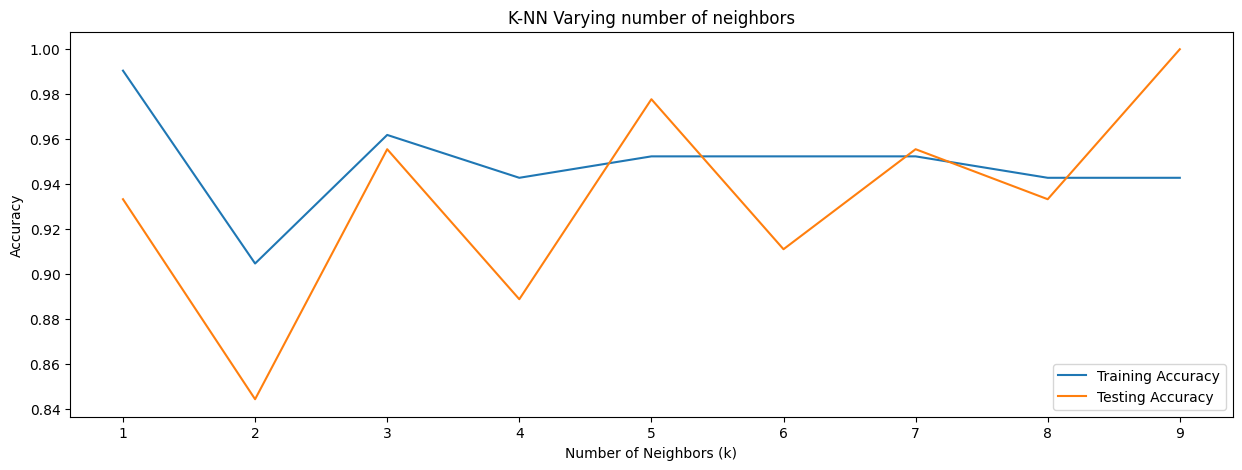

In [18]:
# For the KNN classifier,draw the curves that show train/test accuracy as a function of K.
# Learn KNN and linear regression classifiers from the training data.
train_acc = []
test_acc = []
for k in range (1,10):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train,y_train)
    train_acc.append(accuracy_score(y_train,knn_clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test,knn_clf.predict(X_test)))

# Plot the train/test accuracy curves.
k = range(1,10)
plt.figure(figsize=(15,5))
plt.plot(k, train_acc, label='Training Accuracy')
plt.plot(k, test_acc, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('K-NN Varying number of neighbors')
plt.legend()
plt.show()

**Exercise 4 (self study):**  Also perform (some) of the previous experiments using the full set of 4 predictive features. How does that
change the classification performance? Which of the 3 Iris classes is easiest to classify? Why?

In [19]:
# Divide the iris data into 70% training and 30% test data.
from sklearn.model_selection import train_test_split
# Applying onehot encoding to the labels
onehotclasses = np.zeros((irisdata.target.size,3))
for i in range(irisdata.target.size):
    onehotclasses[i][irisdata.target[i]]=1.0

X_train, X_test, y_train, y_test = train_test_split(irisdata.data, onehotclasses, test_size=0.3, random_state=42)



# Learn KNN and linear regression classifiers from the training data.
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train,y_train)
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)

# Evaluate their accuracy both on the training and test data.
from sklearn.metrics import accuracy_score
print("KNN train accuracy: ",accuracy_score(y_train,knn_clf.predict(X_train)))
print("KNN test accuracy: ",accuracy_score(y_test,knn_clf.predict(X_test)))
print("Linear regression train accuracy: ",accuracy_score(y_train,lr_clf.predict(X_train).round()))
print("Linear regression test accuracy: ",accuracy_score(y_test,lr_clf.predict(X_test).round()))

KNN train accuracy:  1.0
KNN test accuracy:  1.0
Linear regression train accuracy:  0.7142857142857143
Linear regression test accuracy:  0.7777777777777778


The code below will fail, thus I refer to the plot above to answer the question: Which class is the easiest to predict?

In [20]:
# # Plot the decision boundaries of the two classifiers.
# maxval1 = np.max(irisdata.data[:,feat1])
# maxval2 = np.max(irisdata.data[:,feat2])
# maxval3 = np.max(irisdata.data[:,3])
# maxval4 = np.max(irisdata.data[:,0])

# xx, yy, xy, yx = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02), np.arange(0, maxval3+1, 0.02), np.arange(0, maxval4+1, 0.02))

# Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel(), xy.ravel(), yx.ravel()])

# #meshclasses = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
# meshclasses = maxpos(Z)
# meshclasses = meshclasses.reshape(xx.shape)

# plt.figure(figsize=(25,15))
# plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
# plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=onehotclasses, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
# plt.xlabel(irisdata['feature_names'][feat1])
# plt.ylabel(irisdata['feature_names'][feat2])
# plt.show()

## Gaussian mixtures

A helper function for generating data:

In [21]:
def sample_2d_gaussian(meanx,meany,variance_x,variance_y,covariance,numsamps):
    '''
    Generates a random sample of size 'numsamps' from a 2-dimensional Gaussian distribution.
    The Gaussian is defined by the mean vector (meanx,meany) and the
    covariance matrix

    variance_x    covariance
    covariance    variance_y

    All parameters can be freely chosen, except covariance, which must satisfy the inequality

    covariance <= sqrt(variance_x * variance_y)
    '''
    meanvec = np.array([meanx,meany])
    covarmatrix = np.array([[variance_x,covariance],[covariance,variance_y]])
    return multivariate_normal(meanvec,covarmatrix,numsamps)


Loading/generating data: following are two alternative ways to get data consisting of the input features stored in 'features', and the class labels, stored in 'labels'.  Only execute one of the data generating cells, before moving on to the following code!

**A**: sampling data from 2-dimensional Gaussian distributions. For reproducibility, one can fix a random seed.

In [22]:
#np.random.seed(1)
datasize=250
mixturecoeff=np.array([0.4,0.2,0.4])
componentsizes=(datasize*mixturecoeff).astype(int)

class0samp=sample_2d_gaussian(2,3,0.5,0.5,0.45,componentsizes[0])
class1samp=sample_2d_gaussian(5,3,1.0,0.5,-0.45,componentsizes[1])
class2samp=sample_2d_gaussian(3,2,0.5,0.5,0,componentsizes[2])


features=np.concatenate((class0samp,class1samp,class2samp),axis=0)
labels=np.concatenate((np.zeros(componentsizes[0]),np.ones(componentsizes[1]),2*np.ones(componentsizes[2])))

**B**: Loading mi.txt data:

In [23]:
midata = pd.read_csv("../data/MI-labeled.txt", sep=',')
features = np.array(midata[['X1','X2']])
classlabels=midata['Class']
labels = np.zeros(len(classlabels))
for i in range(len(classlabels)):
    if classlabels[i] == 'I':
        labels[i]=1

Preparing meshgrid for plotting decision regions:

In [24]:
maxvalx = np.max(features[:,0])
maxvaly = np.max(features[:,1])
minvalx = np.min(features[:,0])
minvaly = np.min(features[:,1])
border=2
xinterval = (maxvalx-minvalx)/border
yinterval = (maxvaly-minvaly)/border
xx, yy = np.meshgrid(np.arange(minvalx-xinterval, maxvalx+xinterval, xinterval/100), np.arange(minvaly-yinterval, maxvaly+yinterval, yinterval/100))


Learning a classifier -- we have the choice between the Gaussian naive Bayes model, and linear discriminant analysis. 

In [25]:
model=GaussianNB()
#model=LinearDiscriminantAnalysis()

model.fit(features,labels)

GaussianNB()

Applying model to the meshgrid. The models return probabilities for the different classes that are retrieved by the `.predict_proba` method.  We classify a datapoint as belonging to the class with the maximal probability value.

In [26]:
Z=model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
meshclasses = maxpos(Z)
meshclasses = meshclasses.reshape(xx.shape)

Plotting datapoints and decision regions

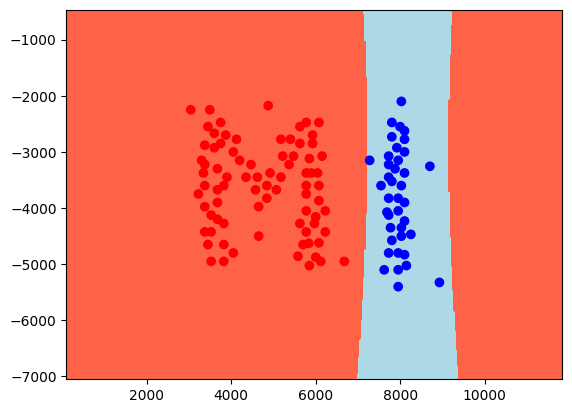

In [27]:
plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
#plt.scatter(features[:,0],features[:,1],c=labels, cmap = mpl.colors.ListedColormap(['y', 'b','g']))
plt.scatter(features[:,0],features[:,1],c=labels, cmap = mpl.colors.ListedColormap(['r', 'b']))
plt.show()

**Exercise 5**: Investigate the decision regions of the GaussianNB and linear discriminant analysis classifiers learned from the MI-labeled.txt data. What is the explanation for their very different structure?


* GNB has more fluent dicision boundaries.
* The LDA has more strict dicision boundaries.
* The variance of the data points and the probability distribution (number of data points in each class) of the classes plays a role when deciding the boundaries when using GNB.

# Exam Topic

**Exercise 6 (self study)**: Create one or several linearly separable Gaussian mixture datasets (can be with only two components) for which some of the models give a perfect separation of the classes, and others don't. 

Create separate test sets using the same parameters for the Gaussian mixture as in the creation of the training set. Can you create a test/train dataset and find classifiers A and B, such that A is better than B on the training data, but B is better than A on the test set? Why is this not such an easy task for the datasets and classifiers we consider here?


K=1 KNN train accuracy:  1.0
K=1 KNN test accuracy:  1.0
K=5 KNN train accuracy:  1.0
K=5 KNN test accuracy:  1.0
Linear regression train accuracy:  1.0
Linear regression test accuracy:  1.0
GuassianNB train accuracy:  1.0
GuassianNB test accuracy:  1.0
LDA train accuracy:  1.0
LDA test accuracy:  1.0


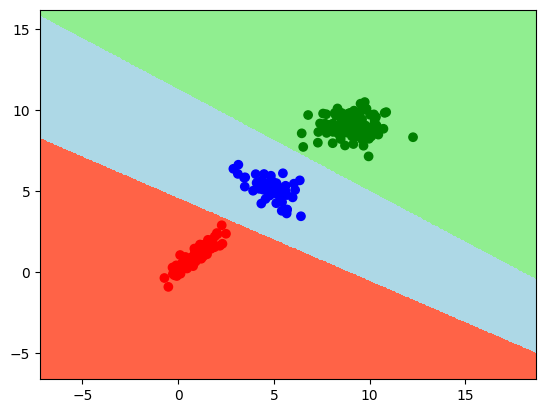

In [55]:
#np.random.seed(1)
datasize=250
mixturecoeff=np.array([0.4,0.2,0.4])
componentsizes=(datasize*mixturecoeff).astype(int)

class0samp=sample_2d_gaussian(1,1,0.5,0.5,0.45,componentsizes[0])
class1samp=sample_2d_gaussian(5,5,1.0,0.5,-0.45,componentsizes[1])
class2samp=sample_2d_gaussian(9,9,1.0,0.5,0,componentsizes[2])


features=np.concatenate((class0samp,class1samp,class2samp),axis=0)
labels=np.concatenate((np.zeros(componentsizes[0]),np.ones(componentsizes[1]),2*np.ones(componentsizes[2])))


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)


# Learn KNN and linear regression classifiers from the training data.
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train,y_train)
knn_new = KNeighborsClassifier(n_neighbors=5)
knn_new.fit(X_train,y_train)
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
gaus_clf = GaussianNB()
gaus_clf.fit(X_train, y_train)
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)

# Evaluate their accuracy both on the training and test data.
from sklearn.metrics import accuracy_score
print("K=1 KNN train accuracy: ",accuracy_score(y_train,knn_clf.predict(X_train)))
print("K=1 KNN test accuracy: ",accuracy_score(y_test,knn_clf.predict(X_test)))
print("K=5 KNN train accuracy: ",accuracy_score(y_train,knn_new.predict(X_train)))
print("K=5 KNN test accuracy: ",accuracy_score(y_test,knn_new.predict(X_test)))
print("Linear regression train accuracy: ",accuracy_score(y_train,lr_clf.predict(X_train).round()))
print("Linear regression test accuracy: ",accuracy_score(y_test,lr_clf.predict(X_test).round()))
print("GuassianNB train accuracy: ",accuracy_score(y_train,gaus_clf.predict(X_train)))
print("GuassianNB test accuracy: ",accuracy_score(y_test,gaus_clf.predict(X_test)))
print("LDA train accuracy: ",accuracy_score(y_train,lda_clf.predict(X_train)))
print("LDA test accuracy: ",accuracy_score(y_test,lda_clf.predict(X_test)))


maxvalx = np.max(features[:,0])
maxvaly = np.max(features[:,1])
minvalx = np.min(features[:,0])
minvaly = np.min(features[:,1])
border=2
xinterval = (maxvalx-minvalx)/border
yinterval = (maxvaly-minvaly)/border
xx, yy = np.meshgrid(np.arange(minvalx-xinterval, maxvalx+xinterval, xinterval/100), np.arange(minvaly-yinterval, maxvaly+yinterval, yinterval/100))


#model=GaussianNB()
model=LinearDiscriminantAnalysis()
model.fit(features,labels)


Z=model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
meshclasses = maxpos(Z)
meshclasses = meshclasses.reshape(xx.shape)

plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(features[:,0],features[:,1],c=labels, cmap = mpl.colors.ListedColormap(['r', 'b','g']))
plt.show()

K=1 KNN train accuracy:  1.0
K=1 KNN test accuracy:  0.8533333333333334
K=5 KNN train accuracy:  0.9257142857142857
K=5 KNN test accuracy:  0.8933333333333333
Linear regression train accuracy:  0.7314285714285714
Linear regression test accuracy:  0.5866666666666667
GuassianNB train accuracy:  0.9085714285714286
GuassianNB test accuracy:  0.8666666666666667
LDA train accuracy:  0.8971428571428571
LDA test accuracy:  0.8266666666666667


c:\Users\Vugs\miniconda3\envs\p7\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


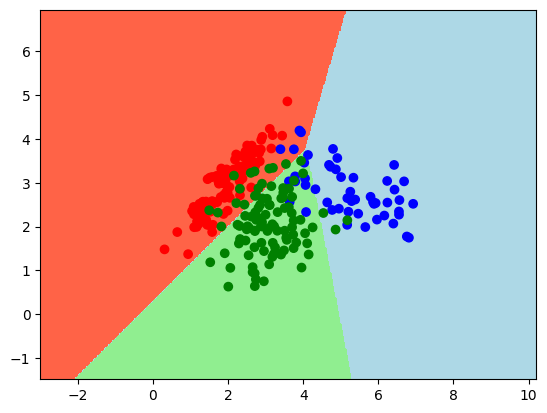

In [108]:
from sklearn.preprocessing import OneHotEncoder

#np.random.seed(1)
datasize=250
mixturecoeff=np.array([0.4,0.2,0.4])
componentsizes=(datasize*mixturecoeff).astype(int)

class0samp=sample_2d_gaussian(2,3,0.5,0.5,0.45,componentsizes[0])
class1samp=sample_2d_gaussian(5,3,1.0,0.5,-0.45,componentsizes[1])
class2samp=sample_2d_gaussian(3,2,0.5,0.5,0.1,componentsizes[2])


features=np.concatenate((class0samp,class1samp,class2samp),axis=0)
labels=np.concatenate((np.zeros(componentsizes[0]),np.ones(componentsizes[1]),2*np.ones(componentsizes[2])))

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# One-hot encoding
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

# Learn KNN and linear regression classifiers from the training data.
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train,y_train)
knn_new = KNeighborsClassifier(n_neighbors=5)
knn_new.fit(X_train,y_train)
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train_encoded)
gaus_clf = GaussianNB()
gaus_clf.fit(X_train, y_train)
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)

#print(lr_clf.predict(X_test).round())

# Evaluate their accuracy both on the training and test data.
from sklearn.metrics import accuracy_score
print("K=1 KNN train accuracy: ",accuracy_score(y_train,knn_clf.predict(X_train)))
print("K=1 KNN test accuracy: ",accuracy_score(y_test,knn_clf.predict(X_test)))
print("K=5 KNN train accuracy: ",accuracy_score(y_train,knn_new.predict(X_train)))
print("K=5 KNN test accuracy: ",accuracy_score(y_test,knn_new.predict(X_test)))
print("Linear regression train accuracy: ",accuracy_score(y_train_encoded,abs(lr_clf.predict(X_train).round())))
print("Linear regression test accuracy: ",accuracy_score(y_test_encoded,abs(lr_clf.predict(X_test).round())))
print("GuassianNB train accuracy: ",accuracy_score(y_train,gaus_clf.predict(X_train)))
print("GuassianNB test accuracy: ",accuracy_score(y_test,gaus_clf.predict(X_test)))
print("LDA train accuracy: ",accuracy_score(y_train,lda_clf.predict(X_train)))
print("LDA test accuracy: ",accuracy_score(y_test,lda_clf.predict(X_test)))


maxvalx = np.max(features[:,0])
maxvaly = np.max(features[:,1])
minvalx = np.min(features[:,0])
minvaly = np.min(features[:,1])
border=2
xinterval = (maxvalx-minvalx)/border
yinterval = (maxvaly-minvaly)/border
xx, yy = np.meshgrid(np.arange(minvalx-xinterval, maxvalx+xinterval, xinterval/100), np.arange(minvaly-yinterval, maxvaly+yinterval, yinterval/100))


Z=lda_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
#Z=lr_clf.predict(np.c_[xx.ravel(), yy.ravel()]) # linear regression
meshclasses = maxpos(Z)
meshclasses = meshclasses.reshape(xx.shape)

plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(features[:,0],features[:,1],c=labels, cmap = mpl.colors.ListedColormap(['r', 'b','g']))
plt.show()

**QUESTION:** Can you create a test/train dataset and find classifiers A and B, such that A is better than B on the training data, but B is better than A on the test set?

**ANSWER:** Yes, We see a KNN with K=1 fits the training data perfectly, however does not perform that well on the test data when compared to the KNN model with K=5. However, the model with K=5 does not fit to the training data as well as the one for K=1. Another case, where this is true os when comparing KNN where K=5 and the Guassian Naive Bayse. Where one performs better on training data and the other better on test, as seen in the image below.

![title](screenshot_1.png)

**QUESTION:** Why is this not such an easy task for the datasets and classifiers we consider here?

**ANSWER:** 
* When running the code multiple times it clearly shows how dependent the models are of the randomness and variabillity. The inherent randomness in data generation and in some learning algorithms can introduce variability in the results, making it challenging to consistently achieve the scenario where A outperforms B on training but not on testing. 

* Balancing overfitting and generalization.

* Gaussian mixtures can create data that is not linearly separable, making it challenging for some classifiers to perform well. As seen consistently for the Least Squares Classifier that mostly performs worse than other models.

* The complexity of Gaussian mixture data makes it hard to predict how different classifiers will behave which is also shown in the plot when running the same code multiple times. The decision boundaries changes, and sometimes drastically. We also see how each class has some outliers that ´mingles´ with other classes making it very hard to draw a any straight or bent line perfectly seperating these.

**Additional Notes:** 

* Linear models are unlikely to overfit and well understood (not black box). They lack diversity return different results due to their different *objective functions* that are optimized in learning.

* Approaches to use linear functions for classification with more than two different class labels *one against all* and *one against one*.

* The General Formula for Gaussian Mixture Model

$$
P(X = x | Y = k) = \frac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}} e^{-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)}
$$

Where $D$ is the number for features and $K$ the number of classes.

**Gaussian Naive Bayes**
- **Type**: Probabilistic classifier.
- **Theory**: Based on Bayes' Theorem with the "naive" assumption of independence between every pair of features.
- **Gaussian Assumption**: Assumes that continuous values associated with each class are distributed according to a Gaussian distribution.
- **Limitations**: Simplistic assumption of feature independence, cannot learn feature interactions.

**Linear Discriminant Analysis (LDA)**
- **Type**: Classifier and dimensionality reduction technique.
- **Theory**: Finds a linear combination of features that best separate two or more classes.
- **Method**: Maximizes the ratio of between-class variance to within-class variance, ensuring maximum separability.
- **Limitations**: Assumes Gaussian distribution, equal covariance matrices for classes, and linear feature separability.

**K-Nearest Neighbors (KNN)**
- **Type**: Non-parametric, instance-based learning algorithm.
- **Theory**: Classifies based on how neighbors are classified.
- **Method**: Uses k closest training examples in the feature space for classification.
- **Limitations**: Computationally expensive, performance reliant on k value and distance metric.


# End of Exam Topic

## Logistic Regression

**Exercise 6**: Consider the following dataset. The data has one numeric attribute X1 , a categorical attribute X2 with three possible states {a, b, c}, and a binary class label Y:

In [30]:
data = pd.DataFrame(  {"X1":np.array([25,2,1,-5,2,2]),"X2":pd.Categorical(['a','a','b','b','c','b']),\
                       "Y":np.array([0,1,0,0,1,0])})
display(data)

,X1,X2,Y
0,25,a,0
1,2,a,1
2,1,b,0
3,-5,b,0
4,2,c,1
5,2,b,0


Pandas provides the get_dummies method to construct a one-hot-encoding for categorical attributes:

In [31]:
data = pd.get_dummies(data,columns = ['X2'])
display(data)

,X1,Y,X2_a,X2_b,X2_c
0,25,0,True,False,False
1,2,1,True,False,False
2,1,0,False,True,False
3,-5,0,False,True,False
4,2,1,False,False,True
5,2,0,False,True,False


Find parameters (manually -- without using sklearn!) for the logistic regression model that classifies these 6 datapoints correctly (there are many solutions). Once you have done that, you can check whether skl.LogisticRegression learns similar parameters. For a fitted model=LogisticRegression() you can retrieve the learned parameters via model.coef_ and model.intercept_ .

In [32]:
import numpy as np

def logistic_function(z):
    return 1 / (1 + np.exp(-z))

def compute_predictions(X, betas):
    z = np.dot(X, betas)
    return logistic_function(z)

def update_betas(X, y, predictions, betas, learning_rate):
    gradient = np.dot(X.T, predictions - y) / y.size
    return betas - learning_rate * gradient

def logistic_regression(X, y, betas, learning_rate, iterations):
    for _ in range(iterations):
        predictions = compute_predictions(X, betas)
        betas = update_betas(X, y, predictions, betas, learning_rate)
    return betas

# Assuming df is your pandas DataFrame
data['X2_a'] = data['X2_a'].astype(int)
data['X2_b'] = data['X2_b'].astype(int)
data['X2_c'] = data['X2_c'].astype(int)

# Preparing the data
X = data[['X1', 'X2_a', 'X2_b', 'X2_c']].values
X = np.insert(X, 0, 1, axis=1)  # Adding intercept term
y = data['Y'].values


# Initializing parameters
betas = np.zeros(X.shape[1])

# Parameters for the learning process
learning_rate = 0.1
iterations = 1000

# Performing logistic regression
final_betas = logistic_regression(X, y, betas, learning_rate, iterations)
final_betas


array([ 0.60503809, -0.27089201,  2.42129684, -4.57297436,  2.75671561])

In [33]:
from sklearn.linear_model import LogisticRegression

# Assuming df is your pandas DataFrame
data['X2_a'] = data['X2_a'].astype(int)
data['X2_b'] = data['X2_b'].astype(int)
data['X2_c'] = data['X2_c'].astype(int)

# Preparing the data
X = data[['X1', 'X2_a', 'X2_b', 'X2_c']].values
y = data['Y'].values

# Creating and training the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Extracting the coefficients
intercept = log_reg.intercept_[0]
coefficients = log_reg.coef_[0]

(intercept, coefficients)

(-0.17572504390892507,
 array([-0.08620682,  0.37085395, -0.84051179,  0.46965594]))

We next look at how LogisticRegression handles multiple classes

In [34]:
irislogreg = LogisticRegression(multi_class='ovr')
irislogreg.fit(irisdata.data[:,[feat1,feat2]],irisdata.target)


LogisticRegression(multi_class='ovr')

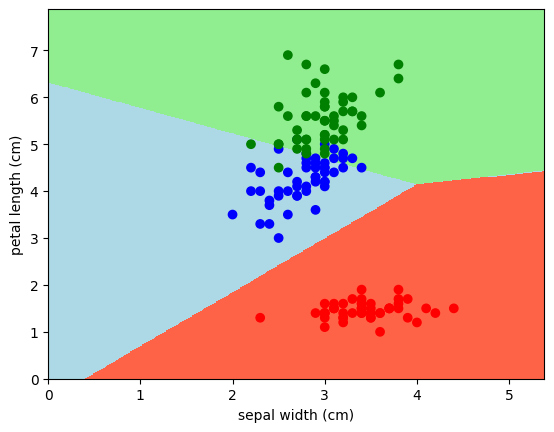

In [35]:
maxval1 = np.max(irisdata.data[:,feat1])
maxval2 = np.max(irisdata.data[:,feat2])
xx, yy = np.meshgrid(np.arange(0, maxval1+1, 0.02), np.arange(0, maxval2+1, 0.02))

Z = irislogreg.predict(np.c_[xx.ravel(), yy.ravel()])

meshclasses = Z


meshclasses = meshclasses.reshape(xx.shape)
plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(irisdata.data[:,feat1],irisdata.data[:,feat2],c=irisdata.target, cmap = mpl.colors.ListedColormap(['r', 'b', 'g']))
plt.xlabel(irisdata['feature_names'][feat1])
plt.ylabel(irisdata['feature_names'][feat2])
plt.show()

**Exercise 7 (self study)**: the <pre>multi_class='ovr'</pre> option for the logistic regression classifier says that multi-class is handled by 'one vs rest'. This should usually lead to regions in the input space where the classification is undefined (cf. Bishop Fig. 4.2). Here we see no undefined decision regions. What is going on?

<ul>
    <li>
        Construct a dataset (e.g. using the sample_2d_gaussian method from above) to construct a dataset with 3 classes where you think there should be an undefined region
    </li>
    <li>
        Construct the decision regions for this data and the LogisticRegression(multi_class='ovr') model
    </li>
    <li>
        Construct the decision regions for the 3 'one vs. rest' classifiers, and compare their decision boundaries to the ones you found above 
    </li>
    <li> Using available online documentation, find out and describe how 'LogisticRegression(multi_class='ovr')' actually defines its decision regions
    </li>
    </ul>